<a href="https://colab.research.google.com/github/TheGreedyOne/latihan/blob/master/machine_learning_beginner_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Muahammad Andrew Amnur Wildan

Email : mandrew_aw@yahoo.com

Domilisi : Depok, Jawa Barat

In [1]:
# import library & check tensorflow version
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.5.0


In [5]:
# downloading data kalibrasi
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-27 11:50:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.84MB/s    in 43s     

2021-07-27 11:51:34 (7.17 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [6]:
# extraksi zip data kalibrasi
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [81]:
# condition jika training target tercapai
class aCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nTraining target achieve 96% ending session...")
      self.model.stop_training = True

callbacks = aCallback()

In [76]:
# menerapkan & mengalokasikan split folder pada data
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = '/content/output/train'
validation_dir = '/content/output/val'
!pip install split-folders
import splitfolders

splitfolders.ratio(base_dir, output="output", seed=1337, ratio=(.75, .25), group_prefix=None)

Copying files: 2188 files [00:00, 3687.37 files/s]


In [77]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [78]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1640 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation= 'relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')

])
model.summary()
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 256)      

In [82]:
history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks=[callbacks])

Epoch 1/20
15/15 - 29s - loss: 0.2132 - accuracy: 0.9187 - val_loss: 0.2487 - val_accuracy: 0.9062
Epoch 2/20
15/15 - 29s - loss: 0.1630 - accuracy: 0.9417 - val_loss: 0.2237 - val_accuracy: 0.9312
Epoch 3/20
15/15 - 29s - loss: 0.1864 - accuracy: 0.9458 - val_loss: 0.3170 - val_accuracy: 0.9000
Epoch 4/20
15/15 - 29s - loss: 0.1402 - accuracy: 0.9479 - val_loss: 0.3018 - val_accuracy: 0.9000
Epoch 5/20
15/15 - 28s - loss: 0.1739 - accuracy: 0.9518 - val_loss: 0.2081 - val_accuracy: 0.9250
Epoch 6/20
15/15 - 29s - loss: 0.1481 - accuracy: 0.9521 - val_loss: 0.2226 - val_accuracy: 0.9187
Epoch 7/20
15/15 - 28s - loss: 0.1319 - accuracy: 0.9627 - val_loss: 0.1454 - val_accuracy: 0.9375

Training target achieve 96% ending session...


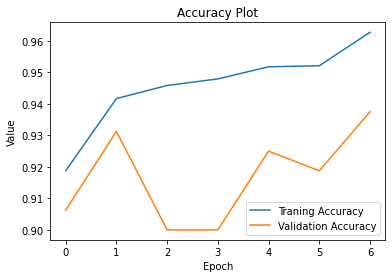

In [83]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'Traning Accuracy') 
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc = "lower right")
plt.show()

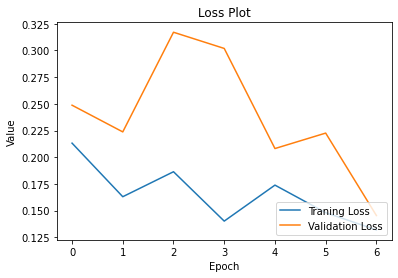

In [84]:
plt.plot(history.history['loss'], label = 'Traning Loss') 
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc = "lower right")
plt.show()

Saving DSC_1177.JPG to DSC_1177.JPG
DSC_1177.JPG
rock


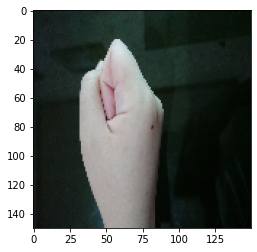

In [89]:
# mengambil data untuk di test
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]==1:
    print('paper')
  elif classes[0,1]==1:
    print('rock')
  else:
    print('scissors')